# Body-Rocking Behavior Recognition

In [152]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [165]:
sessions = ['Session01','Session05','Session06','Session07','Session12','Session13']
#files = ['armIMU.txt','detection.txt','wristIMU.txt']

In [166]:
dataAList = []
dataWList = []
dataOPList = []
for session in sessions:
    dataAList.append(pd.read_csv('TrainingData/' + session + '/armIMU.txt', header=None, sep='\s+'))
    dataWList.append(pd.read_csv('TrainingData/' + session + '/wristIMU.txt', header=None, sep='\s+'))
    dataOPList.append(pd.read_csv('TrainingData/' + session + '/detection.txt', header=None, sep='\s+'))

In [167]:
dataA = pd.concat(dataAList, axis=0, join='outer', join_axes=None, ignore_index=False,\
          keys=None, levels=None, names=None, verify_integrity=False,\
          copy=True)

dataW = pd.concat(dataWList, axis=0, join='outer', join_axes=None, ignore_index=False,\
          keys=None, levels=None, names=None, verify_integrity=False,\
          copy=True)

dataOP = pd.concat(dataOPList, axis=0, join='outer', join_axes=None, ignore_index=False,\
          keys=None, levels=None, names=None, verify_integrity=False,\
          copy=True)


In [168]:
result = pd.concat([dataA, dataW], axis=1)
result.columns = range(result.shape[1])

In [169]:
print(len(result))

924759


In [170]:
X_train, X_test, y_train, y_test = train_test_split(result, dataOP, test_size=0.33, random_state=42)

## TODO :
### 1. Applying Random Forest, SVM, MLP
### 2. Hyper Parameter Tuning

In [171]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X_train, y_train)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [172]:
y_pred = clf.predict(X_test)

In [173]:
accuracy_score(y_test, y_pred)

0.7975233557579193

In [176]:
yp = dataA.ix[:,0].values.tolist()
xp = [ x for x in range(len(dataA.ix[:,0])) ]

In [175]:
plt.plot(xp[:100],yp[0:100],'-o')

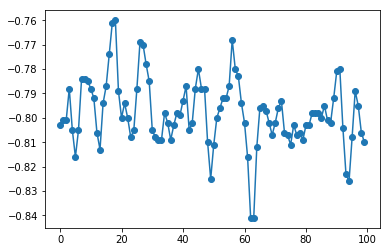

In [164]:
plt.show()